# Case Study 

### Cell Line Summary

1. Mouse Line:  	            Cux2-CreERT2
2. ID:          	            483101699
3. Area: 	                    Primary visual area
4. Layer: 	                    4	
5. Dendrite Type: 	            spiny
6. Apical Dendrite:             intact
7. Hemisphere:   	            left
8. Upstroke:downstroke ratio: 	4.07
9. Adaptation Index:	        0.023
10. Rheobase: 	                150
11. Membrane Time Constant: 	15.2
12. Firing Rate:            	11.3
13. Input Resistance:       	118
14. Ramp Spike Time:        	7.264
15. Resting Potential:      	-78.1
16. F/I Curve Slope:        	0.1

### Neuron Model 

Neuron Type: GLIF 

Parameters under consideration:
1. R_input
2. C
3. El
4. dt
5. th_inf 

The full code can be found here: https://github.com/kevinbdsouza/lstm_glif

* The src files can be found under the folder src
* The loss vectors, images and other data can be found under files 

## Responses for the downloaded model 

Parameters of the model
* R_input:183419927.9118323
* C: 1.0949424420741503e-10
* El:0.0
* dt:5e-05
* th_inf: 1.1958624156695845

<div>
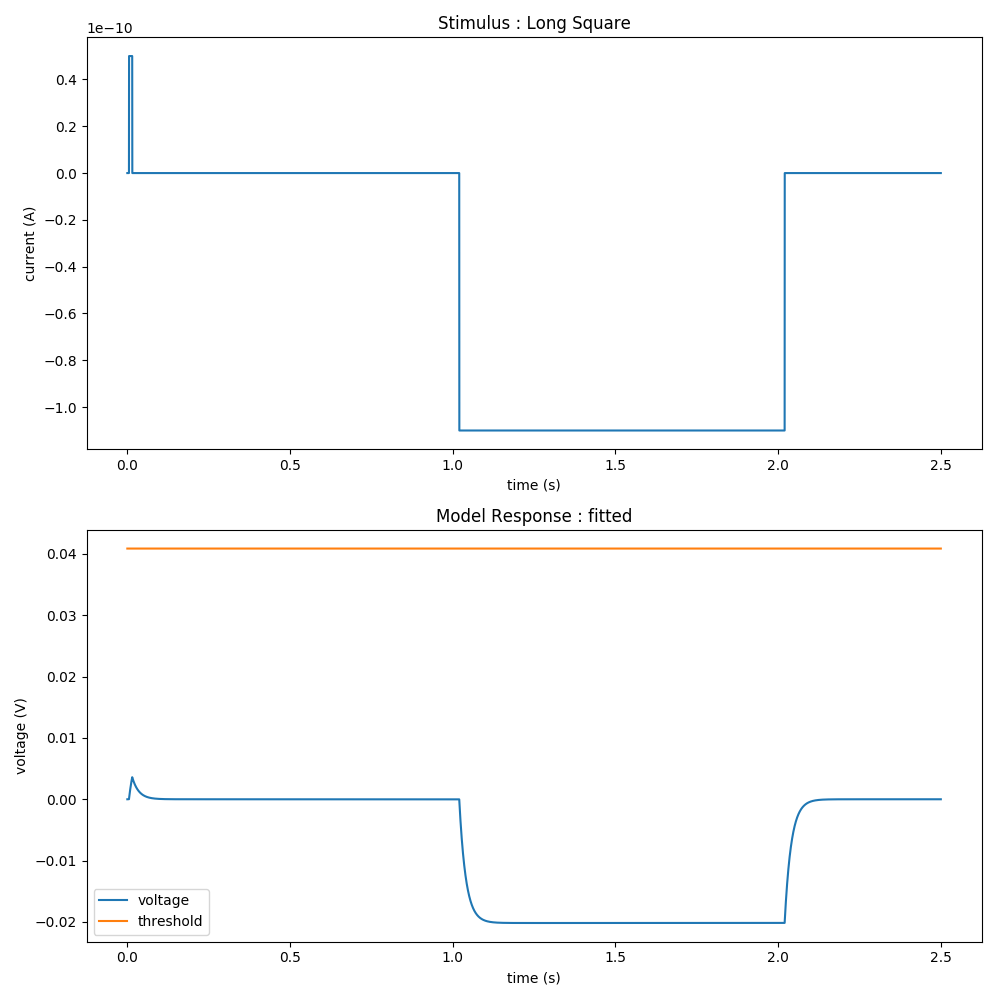
</div>

<div>
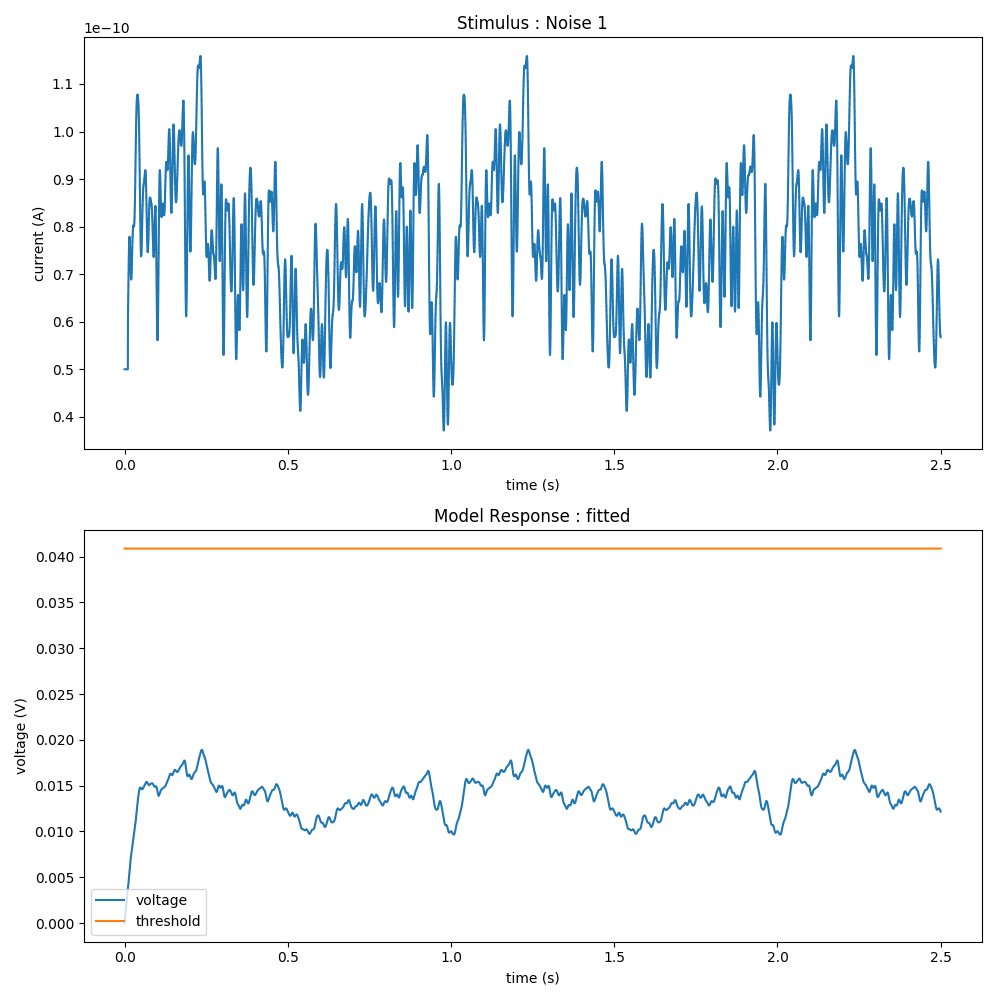
</div>

<div>
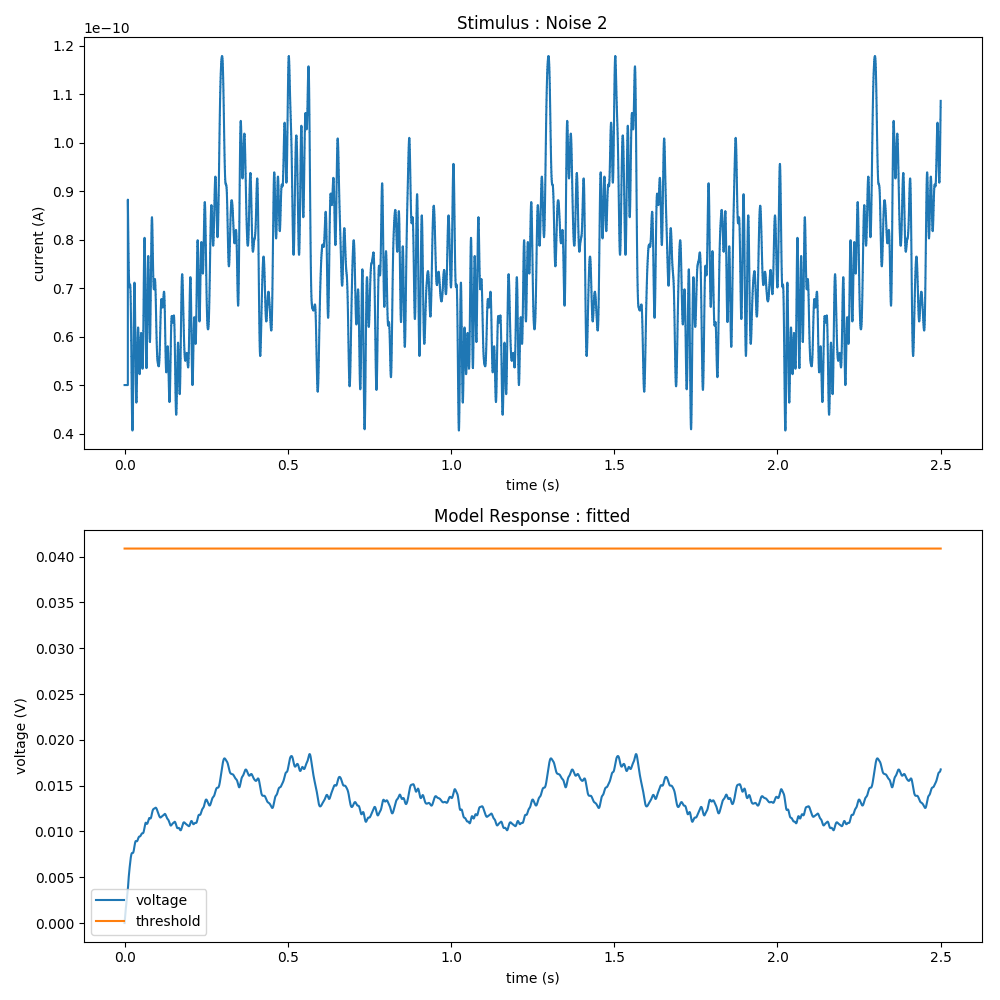
</div>

<div>
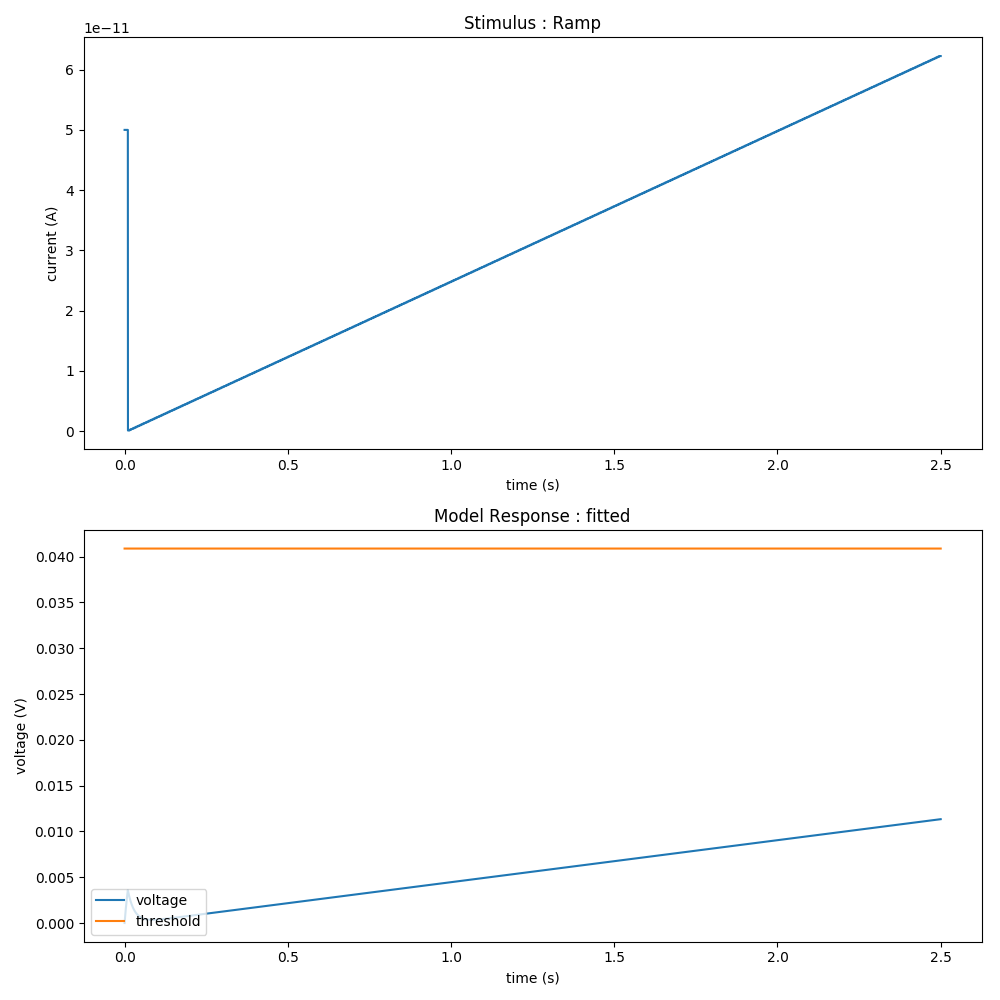
</div>

### Strip plot of different neuron configurations 

The parameters have the following scales:
* R_input:1e-9
* C: 1e9
* El:1
* dt:1e5
* th_inf:1

During training, the given scales are applied so that all the parameter values are in similar ranges for efficient regression by the neural network 

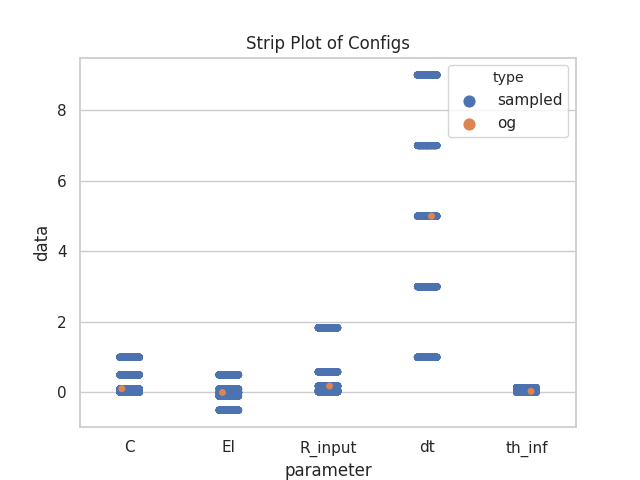

## Data Generation

For each of the 5 parameters 5 different values are chosen around the downloaded fitted neuron parameters resulting in 3125 different configurations as a result of the combination of the parameters. These different neuron condfigurations are simulated with different Noise stimuli to form the training, validation and testing data sets. Specifically, the training and validation data was generated from "Noise 1" stimuli and the testing data from "Noise 2" stimuli. I used separately held out validation and testing datasets and no n-fold cross validation was performed. 

In total the number of signals used were:

1. Training:    5000
2. Validation:  1500
3. Testing:     1500

The code for data generation can be under src/gen_training_data.py

## ML model 

A bidirectional LSTM model was used. The lstm model sequentially ran through the voltage signal creating a hidden representation at each time step. The final hidden state was used as the input to a linear network which predicted the neuron parameters. A Mean Square Error (MSE) loss function was used to train the network.

### Model parameters

1. Hidden state size: 5
2. Bidirectional: True
3. Batch Size: 1
4. Sequence Length: 50000
5. Epochs: 5
6. Learning rate: 1e-2

The voltage signal was truncated to a length of 50000 samples to keep the run times reasonable. A batch size of 1 was chosen so as to fit the data into memory. The number of epochs were chosen as by observing the training and validation losses over epochs. 

The ml model can be found under src/ml_model.py

#### Training and Validation Losses


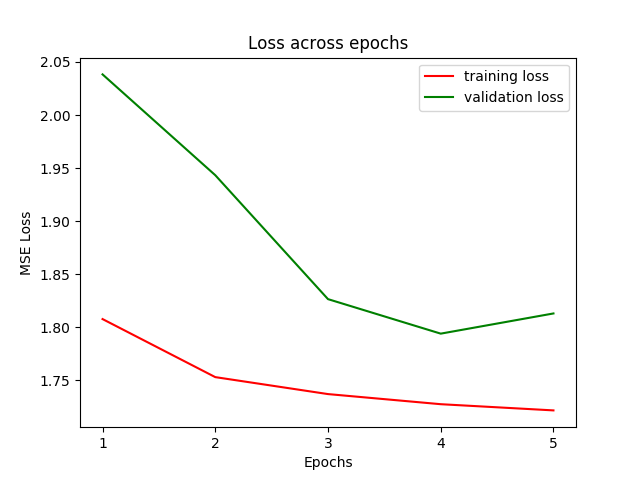


The number of epochs were chosen as 4 observing the validation elbow.

#### Average Test Loss: 1.7527 

### Comparison of parameters

A bar plot of the original downloaded and the neural network inferred parameters is plotted below.

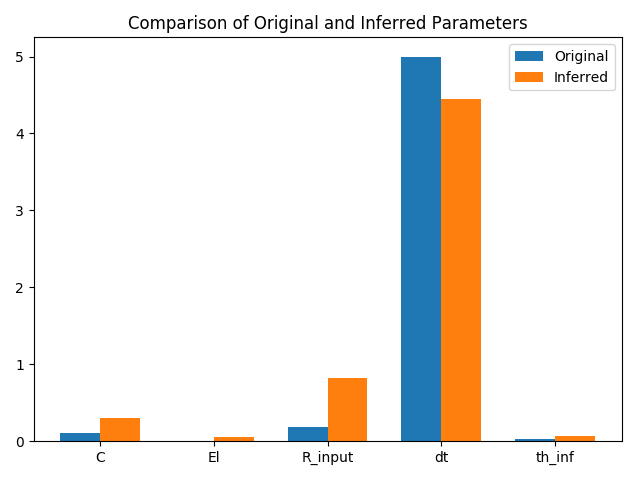

## Model Responses and Spike Times

A set of stimuli were used and the model responses and spike times were plotted for three neuron configs, i.e:

* The downloaded fitted config
* The neural network config with input as the voltage induced by the "Noise 2" stimuli in the downloaded neuron
* A random experimental config 

Stimuli used : 
1. Noise 1
2. Noise 2
3. Ramp
4. Long Square

The plots can be found below and under files/responses

<div>
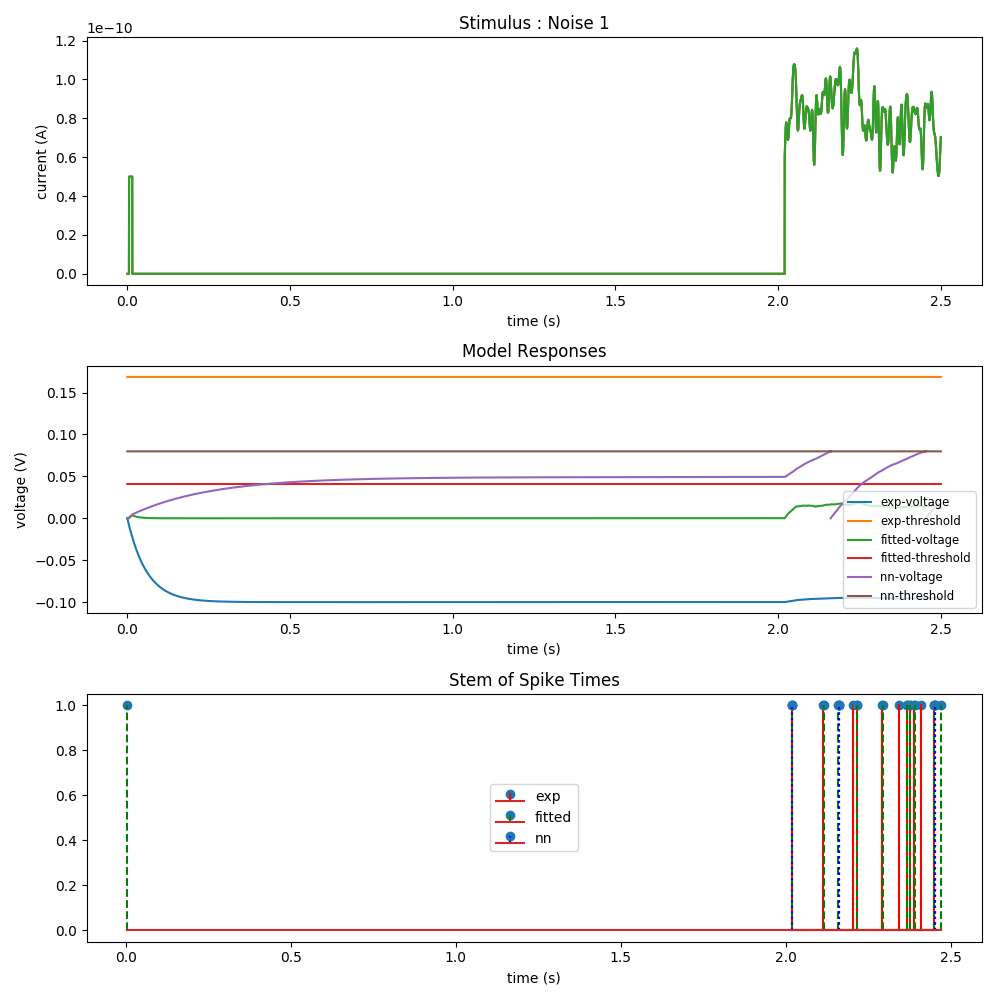
</div>

<div>
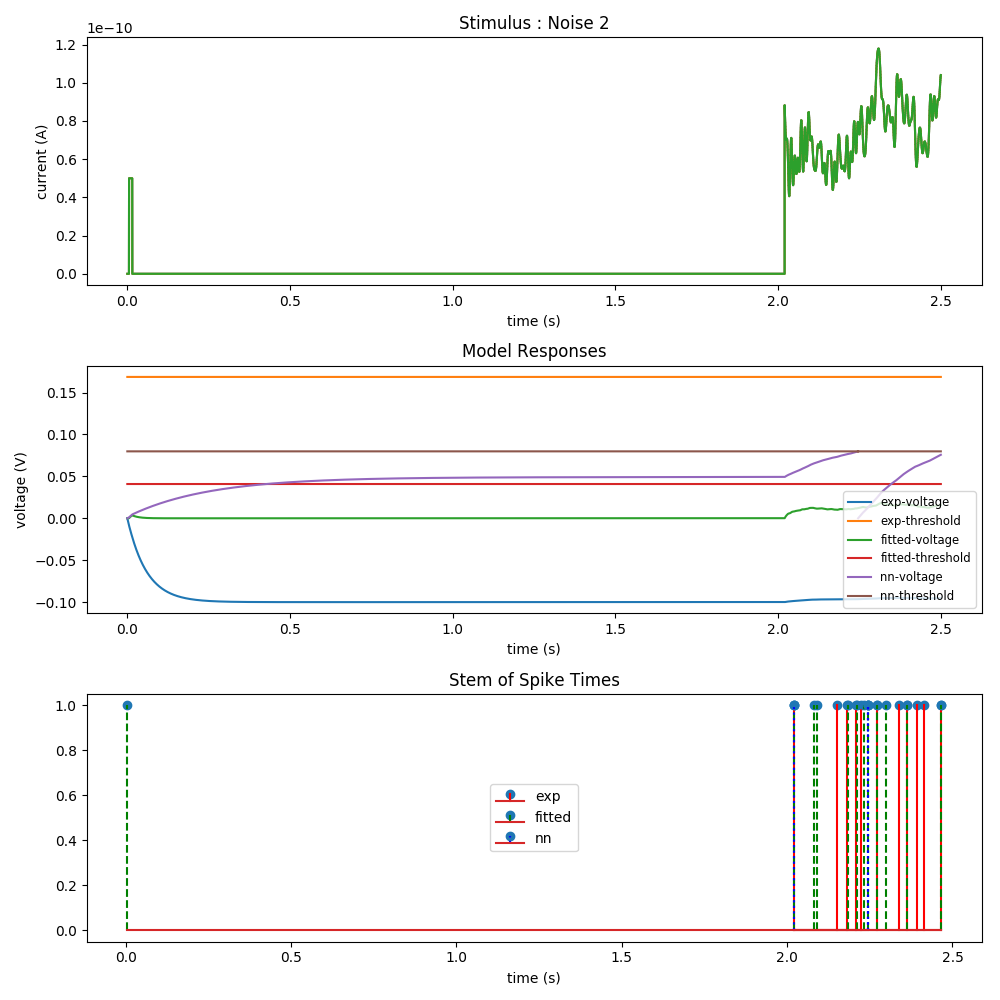
</div>

<div>
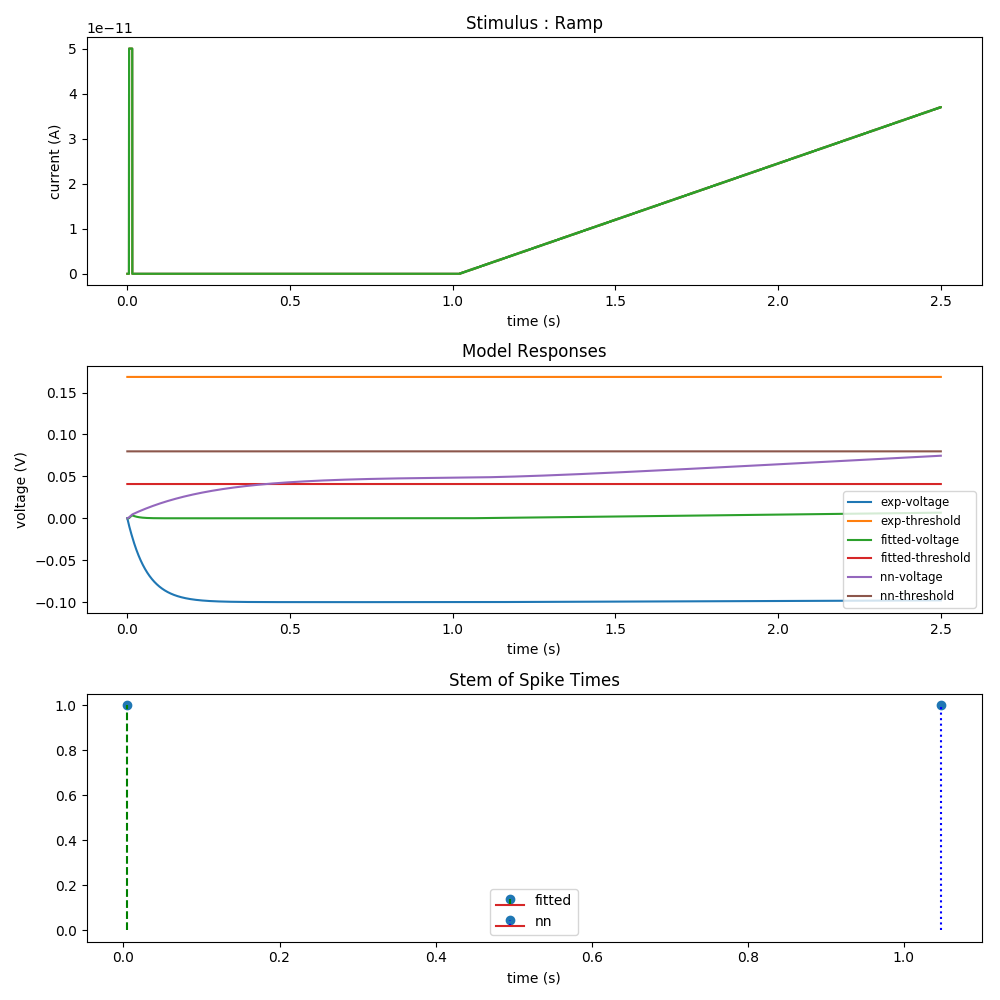
</div>

<div>
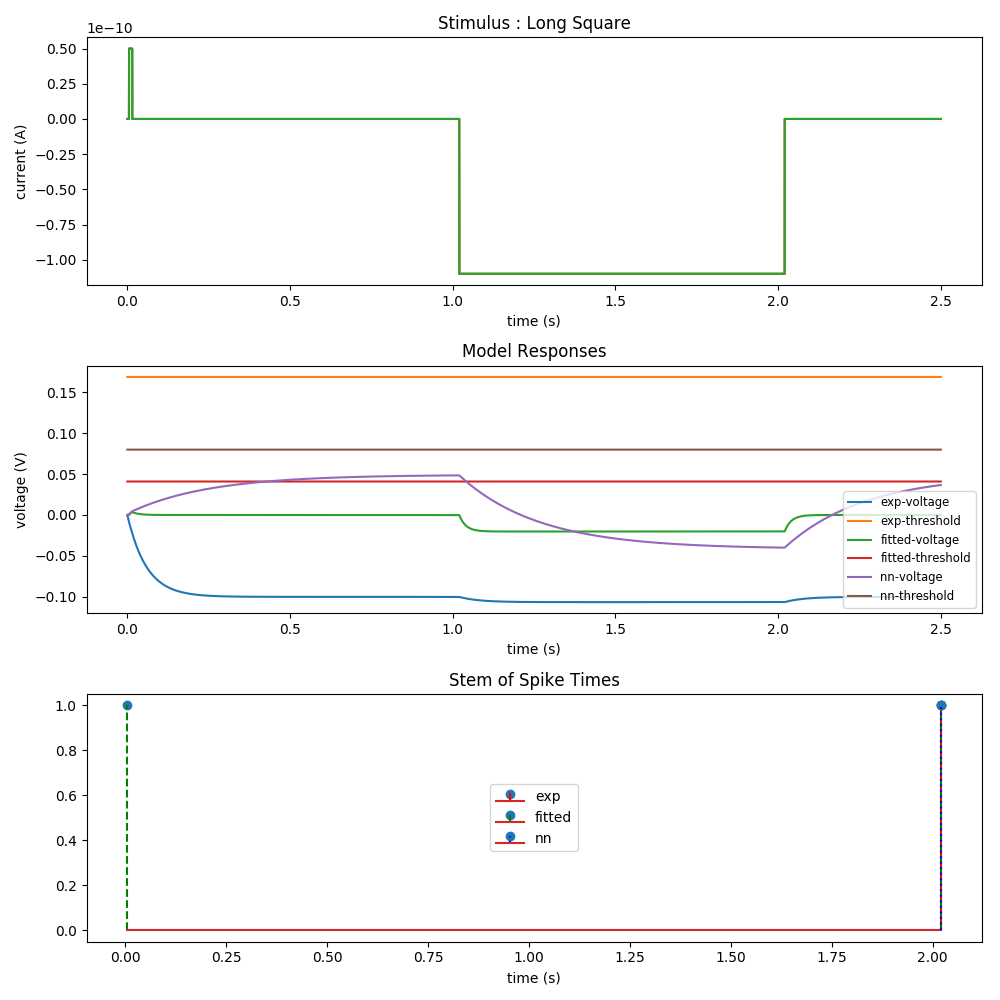
</div>

### Spike comparison 

The dV/dt cutoffs used for the the three different neuron models were:
1. fitted: 0.1
2. nn: 0.005
3. exp: 0.005

Larger number of spikes are observed under the Noise 1 and Noise 2 stims. The ramp and the long square stimuli produce fewer spikes in all the three models compared to noise. It has to be noted however that the spikes detected by the detect_putative_spikes function of the ephys package don't seem to be obvious spikes when observed on the plot.

A comparison of number of spikes:
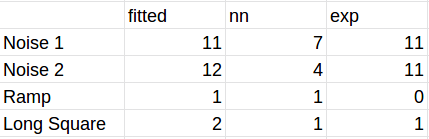


## Observations 

1. The training loss shows quite a bit of flucatuation within the epoch. Increasing the batch size from 1 to perhaps 10-20 would stabilize trainng and arguably lead to better training and test losses 
2. No layer normalization was used. Including layer norm would provide similar benefits as mentioned in (1) 
3. Currently the stimuli is nor used for training the LSTM. Combining the stimuli information with the produced voltage might imrove the performance of the model 
4. No particular rule was followed while creating the training dataset. Including specific interesting values of the parameters rather than just random sampling might allow the NN to see diverse responses. Only noise was used for this particular training, including other stimuli would provide similar benefits. 
5. The spikes detected by detect_putative_spikes function of the ephys package do not correspond to any noticeable "spikes" in the response, have to investigate why certain fluctuations in voltage do not effect the dv/dt threshold.  